In [2]:
# 1. Radial Bias Function

In [79]:
import math

# GATE INPUT
x1=[0,0,1,1]
x2=[0,1,0,1]
# GATE OUTPUT (XOR)
y=[0,1,1,0]
#Weights
w=[-1,1,1,-1]

#RBF Function
def rbf(x,c,s):
    r=math.exp(-(pow(distance(x,c),2)/(2*(pow(2,s)))))
    return r

#Distance Formula Function:
def distance(cn,cm):
    ci,cj=cn
    ck,cl=cm
    d=math.sqrt(pow((ci-ck),2)+pow((cj-cl),2))
    #print(d)
    return d

#Sigma function
def sigma(c):
    dis=[]
    for i in range(len(c)):
        for j in range(i+1,len(c)):
            dis.append(distance(c[i],c[j]))
    s=(sum(dis))/len(dis)
    return s    
        
#Clusters(4 hidden nodes):
c=[[0,0],[0,1],[1,0],[1,1]]

rbfl=[[],[],[],[]]
s=sigma(c)
print("Sigma: "+str(s)+"\n")

for i in range(len(x1)):
    for j in c:
        rbfl[i].append(rbf([x1[i],x2[i]],j,s))
    
for i in range(len(rbfl)):
    print("RBF"+str(i+1)+" : "+str(rbfl[i]))

s0=s1=s2=s3=0
for i in range(len(rbfl)):
    s0=s0+rbfl[i][0]*w[i]
    s1=s1+rbfl[i][1]*w[i]
    s2=s2+rbfl[i][2]*w[i]
    s3=s3+rbfl[i][3]*w[i]

print("\nPredicted Function Value: ")
print(s0)
print(s1)
print(s2)
print(s3)

th=0
print("\nTreseHold value: ",th)

print("\nPredicted GATE Output: ")
ys=[s0,s1,s2,s3]
for i in ys:
    if i>th:
        print(1)
    else: print(0)
    

Sigma: 1.1380711874576983

RBF1 : [1.0, 0.796774705085361, 0.796774705085361, 0.6348499306638639]
RBF2 : [0.796774705085361, 1.0, 0.6348499306638639, 0.796774705085361]
RBF3 : [0.796774705085361, 0.6348499306638639, 1.0, 0.796774705085361]
RBF4 : [0.6348499306638639, 0.796774705085361, 0.796774705085361, 1.0]

Predicted Function Value: 
-0.04130052049314192
0.04130052049314192
0.04130052049314192
-0.04130052049314192

TreseHold value:  0

Predicted GATE Output: 
0
1
1
0


In [ ]:
#RBF

In [82]:
import numpy as np
from scipy.spatial.distance import cdist

class RBFXOR:
    def __init__(self):
        self.centers = np.array([[0, 1], [1, 0]])
        self.weights = None
        self.sigma = 1.0
    
    def _rbf(self, X, center):
        return np.exp(-self.sigma * np.sum((X - center)**2, axis=1))
    
    def fit(self, X, y):
        rbf_activations = np.zeros((len(X), len(self.centers)))
        for i, center in enumerate(self.centers):
            rbf_activations[:, i] = self._rbf(X, center)
        
        rbf_activations = np.hstack([rbf_activations, np.ones((len(X), 1))])
        
        self.weights = np.linalg.pinv(rbf_activations) @ y
    
    def predict(self, X):
        rbf_activations = np.zeros((len(X), len(self.centers)))
        for i, center in enumerate(self.centers):
            rbf_activations[:, i] = self._rbf(X, center)
        
        rbf_activations = np.hstack([rbf_activations, np.ones((len(X), 1))])
        
        return np.where(rbf_activations @ self.weights > 0.5, 1, 0)


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

rbf_xor = RBFXOR()
rbf_xor.fit(X, y)

predictions = rbf_xor.predict(X)
print("Input | Target | Prediction")
print("---------------------------")
for inp, target, pred in zip(X, y, predictions):
    print(f"{inp} | {target}      | {pred}")

print("\nLearned weights (including bias):", rbf_xor.weights)


Input | Target | Prediction
---------------------------
[0 0] | 0      | 0
[0 1] | 1      | 1
[1 0] | 1      | 1
[1 1] | 0      | 0

Learned weights (including bias): [ 2.5026503   2.5026503  -1.84134719]


In [80]:
#SOM

Sample 1 mapped to position (9, 2) with label setosa
Sample 2 mapped to position (9, 5) with label setosa
Sample 3 mapped to position (9, 4) with label setosa
Sample 4 mapped to position (9, 5) with label setosa
Sample 5 mapped to position (9, 1) with label setosa
Sample 6 mapped to position (7, 0) with label setosa
Sample 7 mapped to position (9, 3) with label setosa
Sample 8 mapped to position (9, 2) with label setosa
Sample 9 mapped to position (9, 5) with label setosa
Sample 10 mapped to position (9, 4) with label setosa
Sample 11 mapped to position (8, 0) with label setosa
Sample 12 mapped to position (9, 3) with label setosa
Sample 13 mapped to position (9, 5) with label setosa
Sample 14 mapped to position (9, 5) with label setosa
Sample 15 mapped to position (7, 0) with label setosa
Sample 16 mapped to position (7, 0) with label setosa
Sample 17 mapped to position (7, 0) with label setosa
Sample 18 mapped to position (8, 2) with label setosa
Sample 19 mapped to position (7, 0) w

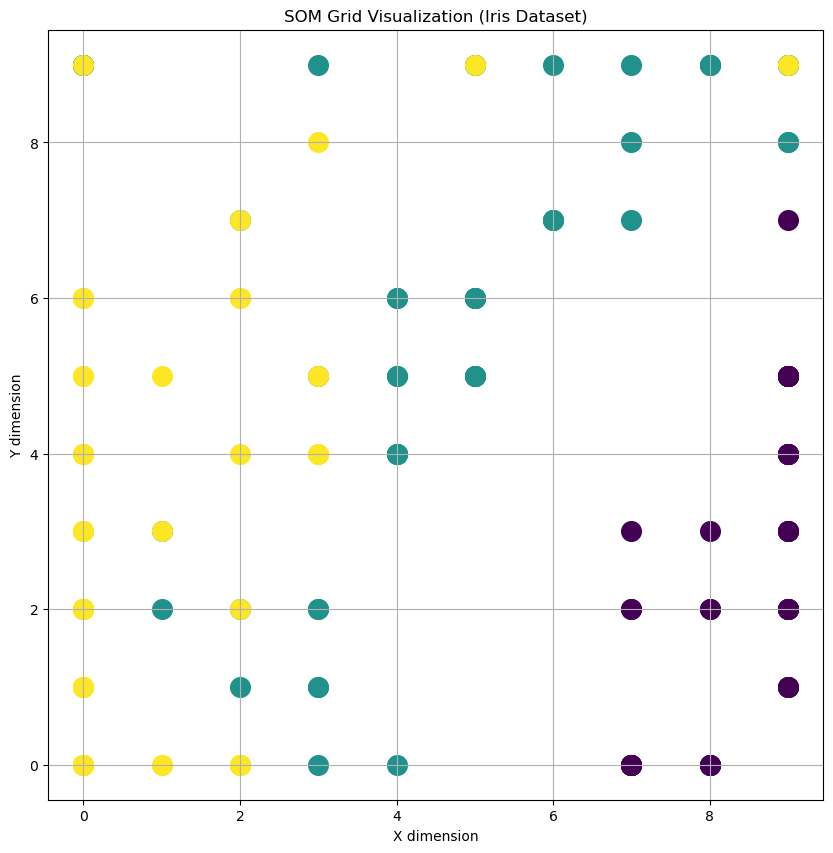

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

class SelfOrganizingMap:
    def __init__(self, x_dim, y_dim, input_dim, learning_rate=0.5, sigma=None, max_iter=1000):
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.sigma = sigma if sigma else max(x_dim, y_dim) / 2
        self.max_iter = max_iter
        self.weights = np.random.rand(x_dim, y_dim, input_dim)
        self.grid = np.array([[np.array([i, j]) for j in range(y_dim)] for i in range(x_dim)])

    def _decay(self, initial_value, t):
        return initial_value * np.exp(-t / self.max_iter)

    def _neighborhood(self, winner, t):
        sigma = self._decay(self.sigma, t)
        d = np.linalg.norm(self.grid - winner, axis=2)
        return np.exp(-d ** 2 / (2 * sigma ** 2))

    def _find_bmu(self, sample):
        diff = self.weights - sample
        dist = np.linalg.norm(diff, axis=2)
        bmu_idx = np.unravel_index(np.argmin(dist), (self.x_dim, self.y_dim))
        return np.array(bmu_idx)

    def train(self, data):
        for t in range(self.max_iter):
            sample = data[np.random.randint(0, len(data))]
            bmu = self._find_bmu(sample)
            neighborhood = self._neighborhood(bmu, t)[..., np.newaxis]
            learning_rate = self._decay(self.learning_rate, t)
            self.weights += neighborhood * learning_rate * (sample - self.weights)

    def map_vector(self, sample):
        bmu = self._find_bmu(sample)
        return bmu

    def map_data(self, data):
        return np.array([self.map_vector(sample) for sample in data])

    def visualize(self, data, labels, label_names):
        plt.figure(figsize=(10, 10))
        for i, sample in enumerate(data):
            x, y = self.map_vector(sample)
            plt.scatter(x, y, color=plt.cm.viridis(labels[i] / 2), s=200, label=f"{label_names[labels[i]]}" if i == 0 else "")
        
        plt.title('SOM Grid Visualization (Iris Dataset)')
        plt.xlabel('X dimension')
        plt.ylabel('Y dimension')
        plt.grid(True)
        plt.show()


if __name__ == "__main__":
    iris = load_iris()
    data = iris.data 
    labels = iris.target  
    label_names = iris.target_names 

    scaler = StandardScaler()
    data = scaler.fit_transform(data)

    som = SelfOrganizingMap(x_dim=10, y_dim=10, input_dim=4, learning_rate=0.5, max_iter=500)
    som.train(data)
    mapped = som.map_data(data)

    for i, sample in enumerate(data):
        x, y = mapped[i]
        print(f"Sample {i+1} mapped to position ({x}, {y}) with label {label_names[labels[i]]}")

    som.visualize(data, labels, label_names)
